# Decision Tree Classification

## Decision Tree Classification
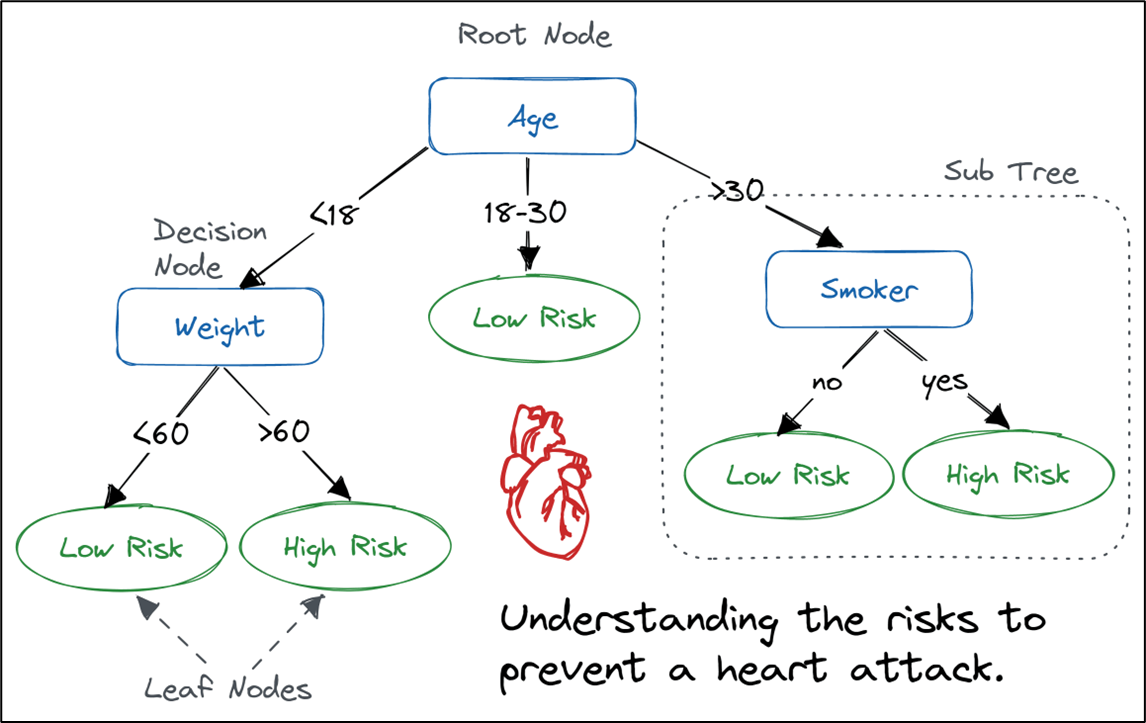

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target Feature - Drug
### Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y

In [7]:
X = df.drop(columns = ["Drug"])
Y = df[["Drug"]]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [10]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

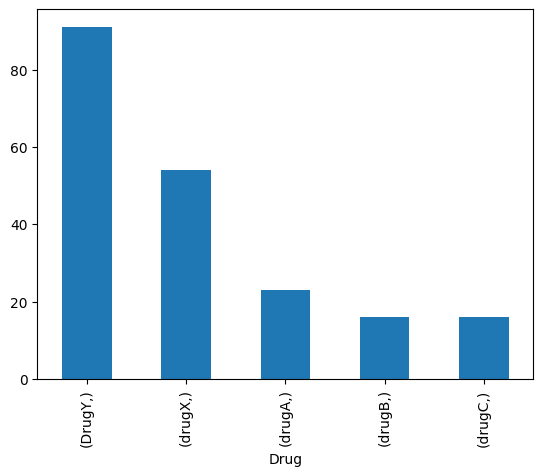

In [11]:
Y.value_counts().plot(kind = "bar")

### Step 4 - Apply Preprocessing on X

In [12]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [13]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [14]:
cat

['Sex', 'BP', 'Cholesterol']

In [15]:
con

['Age', 'Na_to_K']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
)

In [20]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform = "pandas")

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Divide data in train test split

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size = 0.4, random_state = 42)

In [23]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
77,-1.109805,0.426945,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,1.0,0.0,1.0,0.0,0.0,1.0,0.0
187,0.162699,-0.788452,0.0,1.0,1.0,0.0,0.0,1.0,0.0
191,-1.291591,-1.120403,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [24]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [25]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [26]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [27]:
xtrain.shape

(120, 9)

In [28]:
xtest.shape

(80, 9)

In [29]:
ytrain.shape

(120, 1)

In [30]:
ytest.shape

(80, 1)

### Step 6 - Build the Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth = 1,
    min_samples_split = 5,
    min_samples_leaf = 5,
    criterion = "entropy"
)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [32]:
model.score(xtrain, ytrain)

0.725

In [33]:
model.score(xtest, ytest)

0.725

### Hyperparameter Tuning

In [35]:
params = {
    "max_depth":[2, 3, 4, 5, 6],
    "min_samples_split":[5, 6, 7, 8, 9],
    "min_samples_leaf":[5, 6, 7, 8, 9],
    "criterion":["gini", "entropy"]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
base_model = DecisionTreeClassifier()

gscv = GridSearchCV(base_model, param_grid = params, cv = 5, scoring = "f1_macro")

gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [38]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [39]:
gscv.best_score_

np.float64(0.980952380952381)

In [40]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

### Step 7 - Model Evaluation

In [41]:
best_dtc.score(xtrain, ytrain)

1.0

In [42]:
best_dtc.score(xtest, ytest)

1.0

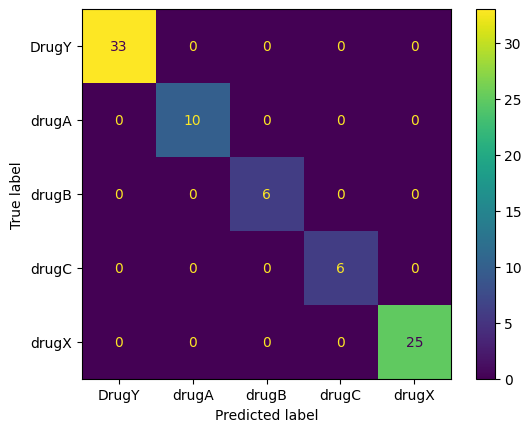

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [44]:
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [45]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [83]:
yprob_test = best_dtc.predict_proba(xtest)
yprob_test[0:5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        33
       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Above model is good model because f1_macro > 0.8

### Plot the decision tree

In [48]:
# Feature names
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [49]:
# Classes
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [51]:
ytrain.value_counts()

Drug 
DrugY    58
drugX    29
drugA    13
drugB    10
drugC    10
Name: count, dtype: int64

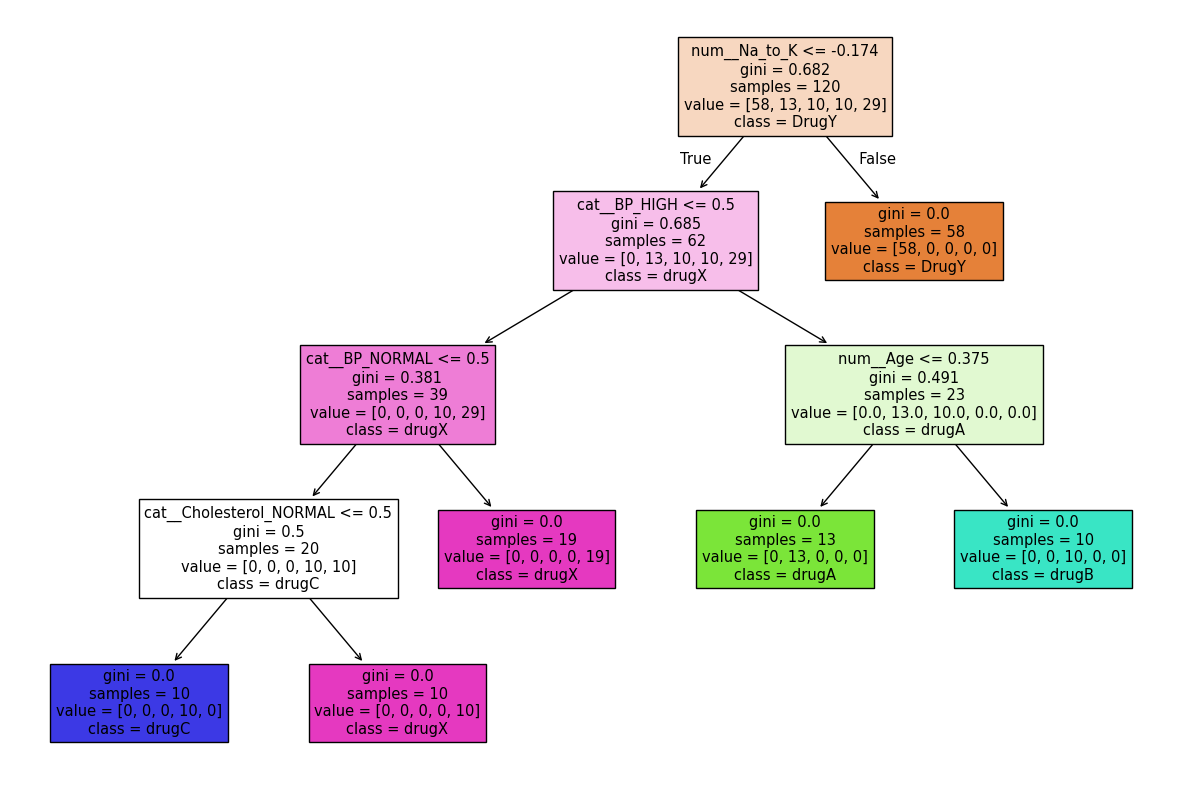

In [85]:
plt.figure(figsize = (15, 10))
plot_tree(best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True)
plt.show()

### Feature Importance - this is applicable only to tree based model

In [53]:
best_dtc.feature_importances_

array([0.13805432, 0.48116583, 0.        , 0.        , 0.19915809,
       0.        , 0.05949678, 0.        , 0.12212497])

In [54]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [55]:
imp = pd.Series(best_dtc.feature_importances_, index = xtrain.columns)
imp

num__Age                   0.138054
num__Na_to_K               0.481166
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_HIGH               0.199158
cat__BP_LOW                0.000000
cat__BP_NORMAL             0.059497
cat__Cholesterol_HIGH      0.000000
cat__Cholesterol_NORMAL    0.122125
dtype: float64

In [56]:
imp.sort_values(ascending = False)

num__Na_to_K               0.481166
cat__BP_HIGH               0.199158
num__Age                   0.138054
cat__Cholesterol_NORMAL    0.122125
cat__BP_NORMAL             0.059497
cat__Sex_M                 0.000000
cat__Sex_F                 0.000000
cat__BP_LOW                0.000000
cat__Cholesterol_HIGH      0.000000
dtype: float64

<Axes: >

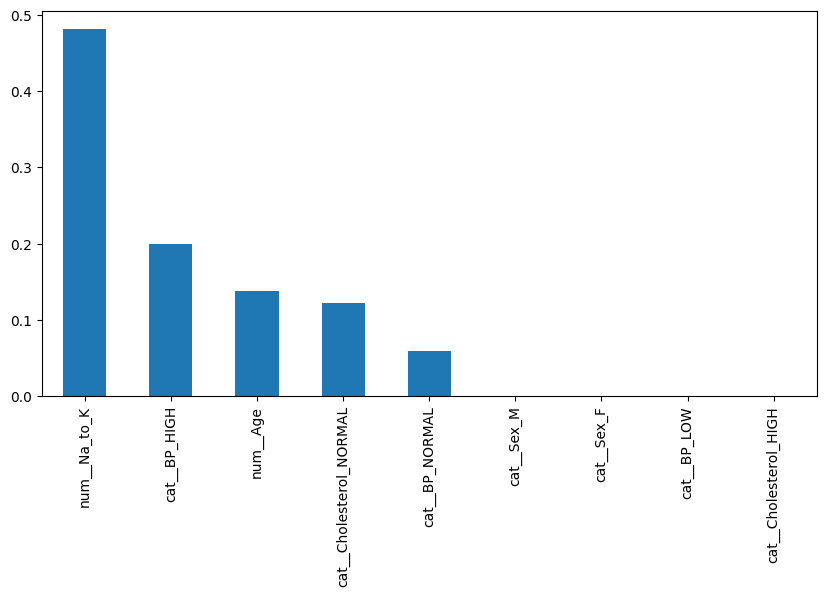

In [82]:
plt.figure(figsize = (10, 5))
imp.sort_values(ascending = False).plot(kind = "bar")

### Step 9 - Out of Sample Prediction

In [58]:
xnew = pd.read_csv("DrugTest.csv")
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN
5,67.0,F,NORMAL,HIGH,15.891
6,NaN,M,NORMAL,HIGH,25.786
7,51.0,M,HIGH,NORMAL,11.343
8,23.0,F,HIGH,HIGH,25.355
9,35.0,M,LOW,NORMAL,9.170


In [59]:
xnew.isna().sum()

Age            2
Sex            0
BP             1
Cholesterol    0
Na_to_K        3
dtype: int64

In [60]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [61]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.352186,0.934448,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.776354,0.155639,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.374607,-0.911824,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.435202,-0.704354,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.556393,-0.298088,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [62]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'drugX'], dtype=object)

In [63]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [64]:
xnew["Drug"] = preds
xnew[best_dtc.classes_] = probs

In [65]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,22.0,F,HIGH,NORMAL,22.818,DrugY,1.0,0.0,0.0,0.0,0.0
1,15.0,M,HIGH,NORMAL,17.206,DrugY,1.0,0.0,0.0,0.0,0.0
2,67.0,M,NORMAL,NORMAL,9.514,drugX,0.0,0.0,0.0,0.0,1.0
3,68.0,M,NaN,HIGH,11.009,drugB,0.0,0.0,1.0,0.0,0.0
4,70.0,F,NORMAL,HIGH,NaN,drugX,0.0,0.0,0.0,0.0,1.0
5,67.0,F,NORMAL,HIGH,15.891,DrugY,1.0,0.0,0.0,0.0,0.0
6,NaN,M,NORMAL,HIGH,25.786,DrugY,1.0,0.0,0.0,0.0,0.0
7,51.0,M,HIGH,NORMAL,11.343,drugB,0.0,0.0,1.0,0.0,0.0
8,23.0,F,HIGH,HIGH,25.355,DrugY,1.0,0.0,0.0,0.0,0.0
9,35.0,M,LOW,NORMAL,9.170,drugX,0.0,0.0,0.0,0.0,1.0


### Save the model object, preprocessor

In [66]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [67]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [68]:
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)

In [69]:
import joblib
joblib.dump(pre, "DrugPre.joblib")

['DrugPre.joblib']

In [70]:
joblib.dump(best_dtc, "DrugModel.joblib")

['DrugModel.joblib']

### Load pre, model from file

In [71]:
p = joblib.load("DrugPre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [72]:
m = joblib.load("DrugModel.joblib")
m

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=5)